In [1]:
from utz import *
from humanize import naturalsize

[Papermill](https://papermill.readthedocs.io/en/latest/) parameters:

In [2]:
name = 'fetch-1'
out_fmt = 'csv'

In [3]:
# Parameters
name = "fetch-1"


In [4]:
makedirs(name, exist_ok=True)
def save(df, df_name, out_fmt=out_fmt):
    if out_fmt == 'csv':
        df.to_csv(f'{name}/{df_name}.csv')
    elif out_fmt in [ 'pqt', 'parquet' ]:
        df.to_parquet(f'{name}/{df_name}.parquet')
    else:
        raise ValueError(f'Unrecognize out_fmt: {out_fmt}')

In [5]:
har_path = f'{name}.har'
har = read_json(har_path)
har

,log
creator,"{'name': 'WebInspector', 'version': '537.36'}"
entries,"[{'_initiator': {'type': 'script', 'stack': {'..."
pages,[{'startedDateTime': '2024-01-07T22:24:08.520Z...
version,1.2


In [6]:
entries = DF(har.loc['entries', 'log'])
entries

,_initiator,_priority,_resourceType,cache,pageref,request,response,serverIPAddress,startedDateTime,time,timings,connection
0,"{'type': 'script', 'stack': {'callFrames': [{'...",High,fetch,{},page_2,"{'method': 'GET', 'url': 'https://cdn.jsdelivr...","{'status': 200, 'statusText': '', 'httpVersion...",151.101.1.229,2024-01-07T22:28:13.932Z,74.572,"{'blocked': 35.761999719053506, 'dns': -1, 'ss...",NaN
1,"{'type': 'script', 'stack': {'callFrames': [{'...",High,fetch,{},page_2,"{'method': 'GET', 'url': 'https://cdn.jsdelivr...","{'status': 200, 'statusText': '', 'httpVersion...",151.101.1.229,2024-01-07T22:28:13.933Z,74.268,"{'blocked': 35.21600038826465, 'dns': -1, 'ssl...",NaN
2,"{'type': 'script', 'stack': {'callFrames': [{'...",High,fetch,{},page_2,"{'method': 'GET', 'url': 'https://cdn.jsdelivr...","{'status': 200, 'statusText': '', 'httpVersion...",151.101.1.229,2024-01-07T22:28:13.933Z,74.509,"{'blocked': 35.12499993783236, 'dns': -1, 'ssl...",NaN
3,"{'type': 'script', 'stack': {'callFrames': [{'...",High,fetch,{},page_2,"{'method': 'GET', 'url': 'https://cdn.jsdelivr...","{'status': 200, 'statusText': '', 'httpVersion...",151.101.1.229,2024-01-07T22:28:13.933Z,76.545,"{'blocked': 34.914999970644715, 'dns': -1, 'ss...",NaN
4,"{'type': 'script', 'stack': {'callFrames': [{'...",High,fetch,{},page_2,"{'method': 'GET', 'url': 'https://cdn.jsdelivr...","{'status': 200, 'statusText': '', 'httpVersion...",151.101.1.229,2024-01-07T22:28:13.934Z,72.363,"{'blocked': 34.1630001244247, 'dns': -1, 'ssl'...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
360,"{'type': 'script', 'stack': {'callFrames': [{'...",VeryHigh,xhr,{},NaN,"{'method': 'GET', 'url': 'https://duckdb-repl....","{'status': 206, 'statusText': 'Partial Content...",52.216.213.241,2024-01-07T22:28:19.142Z,25.164,"{'blocked': 1.142999707669019, 'dns': -1, 'ssl...",358721
361,"{'type': 'script', 'stack': {'callFrames': [{'...",VeryHigh,xhr,{},NaN,"{'method': 'GET', 'url': 'https://duckdb-repl....","{'status': 206, 'statusText': 'Partial Content...",52.216.213.241,2024-01-07T22:28:19.156Z,30.722,"{'blocked': 6.881999803781509, 'dns': -1, 'ssl...",358810
362,"{'type': 'script', 'stack': {'callFrames': [{'...",VeryHigh,xhr,{},NaN,"{'method': 'GET', 'url': 'https://duckdb-repl....","{'status': 206, 'statusText': 'Partial Content...",52.216.213.241,2024-01-07T22:28:19.167Z,33.616,"{'blocked': 0.8379999601244921, 'dns': -1, 'ss...",358721
363,"{'type': 'script', 'stack': {'callFrames': [{'...",VeryHigh,xhr,{},NaN,"{'method': 'GET', 'url': 'https://duckdb-repl....","{'status': 206, 'statusText': 'Partial Content...",52.216.213.241,2024-01-07T22:28:19.187Z,26.357,"{'blocked': 0.9640000154674051, 'dns': -1, 'ss...",358810


In [7]:
req = pd.json_normalize(entries.request)
res = pd.json_normalize(entries.response)

In [8]:
headers = req.headers.apply(lambda headers: { h['name']: h['value'] for h in headers }).apply(Series)
headers

,:authority,:method,:path,:scheme,accept,accept-encoding,accept-language,cache-control,origin,pragma,referer,sec-ch-ua,sec-ch-ua-mobile,sec-ch-ua-platform,sec-fetch-dest,sec-fetch-mode,sec-fetch-site,user-agent,Referer,User-Agent,Range
0,cdn.jsdelivr.net,GET,/npm/@duckdb/duckdb-wasm@1.28.0/dist/duckdb-br...,https,*/*,"gzip, deflate, br","en-US,en;q=0.9",no-cache,http://127.0.0.1:3002,no-cache,http://127.0.0.1:3002/,"""Not_A Brand"";v=""8"", ""Chromium"";v=""120"", ""Goog...",?0,"""macOS""",empty,cors,cross-site,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,NaN,NaN,NaN
1,cdn.jsdelivr.net,GET,/npm/@duckdb/duckdb-wasm@1.28.0/dist/duckdb-br...,https,*/*,"gzip, deflate, br","en-US,en;q=0.9",no-cache,http://127.0.0.1:3002,no-cache,http://127.0.0.1:3002/,"""Not_A Brand"";v=""8"", ""Chromium"";v=""120"", ""Goog...",?0,"""macOS""",empty,cors,cross-site,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,NaN,NaN,NaN
2,cdn.jsdelivr.net,GET,/npm/@duckdb/duckdb-wasm@1.28.0/dist/duckdb-br...,https,*/*,"gzip, deflate, br","en-US,en;q=0.9",no-cache,http://127.0.0.1:3002,no-cache,http://127.0.0.1:3002/,"""Not_A Brand"";v=""8"", ""Chromium"";v=""120"", ""Goog...",?0,"""macOS""",empty,cors,cross-site,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,NaN,NaN,NaN
3,cdn.jsdelivr.net,GET,/npm/@duckdb/duckdb-wasm@1.28.0/dist/duckdb-br...,https,*/*,"gzip, deflate, br","en-US,en;q=0.9",no-cache,http://127.0.0.1:3002,no-cache,http://127.0.0.1:3002/,"""Not_A Brand"";v=""8"", ""Chromium"";v=""120"", ""Goog...",?0,"""macOS""",empty,cors,cross-site,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,NaN,NaN,NaN
4,cdn.jsdelivr.net,GET,/npm/@duckdb/duckdb-wasm@1.28.0/dist/duckdb-br...,https,*/*,"gzip, deflate, br","en-US,en;q=0.9",no-cache,http://127.0.0.1:3002,no-cache,http://127.0.0.1:3002/,"""Not_A Brand"";v=""8"", ""Chromium"";v=""120"", ""Goog...",?0,"""macOS""",empty,cors,cross-site,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,bytes=7356416-7421951
361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,bytes=7340032-7356415
362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,bytes=7421952-7684095
363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,bytes=7356416-7421951


In [9]:
ranges = headers.Range.dropna()
ranges = ranges.str.extract(r'bytes=(?P<start>\d+)-(?P<last>\d+)?')
starts = ranges.start.astype(int)
ends = ranges['last'].apply(lambda last: nan if isna(last) else int(last) + 1).rename('end')
ranges = sxs(starts, ends)
ranges

,start,end
29,0,NaN
30,0,16384.0
32,25690112,25706496.0
33,0,NaN
34,0,16384.0
...,...,...
360,7356416,7421952.0
361,7340032,7356416.0
362,7421952,7684096.0
363,7356416,7421952.0


In [10]:
suffix_range_mask = ~ranges.start.isna() & ranges.end.isna()

In [11]:
e1 = sxs(req.method, req.url, res['content.size'].rename('size'), ranges)
e1

,method,url,size,start,end
0,GET,https://cdn.jsdelivr.net/npm/@duckdb/duckdb-wa...,0,NaN,NaN
1,GET,https://cdn.jsdelivr.net/npm/@duckdb/duckdb-wa...,0,NaN,NaN
2,GET,https://cdn.jsdelivr.net/npm/@duckdb/duckdb-wa...,0,NaN,NaN
3,GET,https://cdn.jsdelivr.net/npm/@duckdb/duckdb-wa...,0,NaN,NaN
4,GET,https://cdn.jsdelivr.net/npm/@duckdb/duckdb-wa...,0,NaN,NaN
...,...,...,...,...,...
360,GET,https://duckdb-repl.s3.amazonaws.com/1e6-idx.d...,65536,7356416.0,7421952.0
361,GET,https://duckdb-repl.s3.amazonaws.com/4e6-idx.d...,16384,7340032.0,7356416.0
362,GET,https://duckdb-repl.s3.amazonaws.com/1e6-idx.d...,262144,7421952.0,7684096.0
363,GET,https://duckdb-repl.s3.amazonaws.com/4e6-idx.d...,65536,7356416.0,7421952.0


In [12]:
d1 = e1[e1.url.str.endswith('.duckdb')]
d1

,method,url,size,start,end
28,HEAD,https://duckdb-repl.s3.amazonaws.com/5e5.duckdb,0,NaN,NaN
29,HEAD,https://duckdb-repl.s3.amazonaws.com/5e5.duckdb,0,0.0,NaN
30,GET,https://duckdb-repl.s3.amazonaws.com/5e5.duckdb,16384,0.0,16384.0
31,HEAD,https://duckdb-repl.s3.amazonaws.com/2e5.duckdb,0,NaN,NaN
32,GET,https://duckdb-repl.s3.amazonaws.com/5e5.duckdb,16384,25690112.0,25706496.0
...,...,...,...,...,...
360,GET,https://duckdb-repl.s3.amazonaws.com/1e6-idx.d...,65536,7356416.0,7421952.0
361,GET,https://duckdb-repl.s3.amazonaws.com/4e6-idx.d...,16384,7340032.0,7356416.0
362,GET,https://duckdb-repl.s3.amazonaws.com/1e6-idx.d...,262144,7421952.0,7684096.0
363,GET,https://duckdb-repl.s3.amazonaws.com/4e6-idx.d...,65536,7356416.0,7421952.0


In [13]:
d1.method.value_counts()

method
GET     295
HEAD     28
Name: count, dtype: int64

In [14]:
name_idx = d1.url.str.extract(r'.*/(?P<name>(?P<data_idx>\de\d).*)')
indexed = name_idx['name'].str.contains('-idx').rename('indexed')
name_idx = sxs(name_idx, indexed)
names = name_idx['name']
name_idxs = name_idx.drop_duplicates().set_index('name')
nrows = name_idxs.data_idx.apply(lambda s: int(float(s))).rename('nrows')
name_idxs = sxs(name_idxs, nrows).sort_values(['nrows', 'indexed'])
name_idxs

,data_idx,indexed,nrows
name,,,
1e5.duckdb,1e5,False,100000
1e5-idx.duckdb,1e5,True,100000
2e5.duckdb,2e5,False,200000
2e5-idx.duckdb,2e5,True,200000
5e5.duckdb,5e5,False,500000
5e5-idx.duckdb,5e5,True,500000
1e6.duckdb,1e6,False,1000000
1e6-idx.duckdb,1e6,True,1000000
2e6.duckdb,2e6,False,2000000


In [15]:
gets = sxs(d1, names)
gets = gets[gets['size'] > 0]
assert gets.method.unique().tolist() == ['GET']
gets = gets[['name', 'size']]
gets = (
    gets
    .merge(
        ranges,
        how='left',
        left_index=True,
        right_index=True,
    )
    .astype({ 'start': int, 'end': int })
    [[ 'name', 'start', 'end', 'size', ]]
)
gets

,name,start,end,size
30,5e5.duckdb,0,16384,16384
32,5e5.duckdb,25690112,25706496,16384
34,2e5.duckdb,0,16384,16384
35,5e5.duckdb,25706496,25772032,65536
45,5e5.duckdb,25772032,25964544,192512
...,...,...,...,...
360,1e6-idx.duckdb,7356416,7421952,65536
361,4e6-idx.duckdb,7340032,7356416,16384
362,1e6-idx.duckdb,7421952,7684096,262144
363,4e6-idx.duckdb,7356416,7421952,65536


In [16]:
assert (gets.start + gets['size'] == gets.end).all()

In [17]:
save(gets, 'gets')

In [18]:
def get_stats(df):
    return dict(
        num=len(df),
        max=max(df),
        min=min(df),
    )
req_stats = gets.groupby('name')['size'].apply(get_stats)
req_stats.index = req_stats.index.set_names('stat', level=1)
req_stats = req_stats.reset_index(level=1).pivot(columns='stat', values='size')
req_stats.columns.name = ''
req_stats

,max,min,num
name,,,
1e5-idx.duckdb,4194304,16384,9
1e5.duckdb,4124672,16384,5
1e6-idx.duckdb,4194304,16384,26
1e6.duckdb,4194304,16384,19
2e5-idx.duckdb,4194304,16384,23
2e5.duckdb,4194304,16384,20
2e6-idx.duckdb,4194304,16384,22
2e6.duckdb,4194304,16384,23
4e6-idx.duckdb,4194304,16384,27


In [19]:
fetched = gets.groupby('name')['size'].sum().rename('fetched')
fetched_iec = fetched.apply(naturalsize).rename('fetched_iec')
fetched = sxs(fetched, fetched_iec)
fetched = (
    sxs(
        fetched,
        name_idxs,
    )
    .sort_values(['nrows', 'indexed'])
    [fetched.columns]
)
fetched

,fetched,fetched_iec
name,,
1e5.duckdb,5517312,5.5 MB
1e5-idx.duckdb,7434240,7.4 MB
2e5.duckdb,13185024,13.2 MB
2e5-idx.duckdb,13598720,13.6 MB
5e5.duckdb,12480512,12.5 MB
5e5-idx.duckdb,13942784,13.9 MB
1e6.duckdb,12136448,12.1 MB
1e6-idx.duckdb,13942784,13.9 MB
2e6.duckdb,13529088,13.5 MB


In [20]:
import boto3
s3 = boto3.client('s3')

In [21]:
bkt = 'duckdb-repl'
def get_object_size(name):
    res = s3.head_object(Bucket=bkt, Key=name)
    return res['ContentLength']

s3_size = fetched.index.to_series().apply(get_object_size).rename('size')
s3_size_iec = s3_size.apply(naturalsize).rename('size_iec')

In [22]:
stats = sxs(fetched, s3_size, s3_size_iec, name_idxs[['nrows', 'indexed']]).merge(req_stats, how='left', left_index=True, right_index=True, validate='1:1')
stats

,fetched,fetched_iec,size,size_iec,nrows,indexed,max,min,num
name,,,,,,,,,
1e5.duckdb,5517312,5.5 MB,5517312,5.5 MB,100000,False,4124672,16384,5
1e5-idx.duckdb,7434240,7.4 MB,7090176,7.1 MB,100000,True,4194304,16384,9
2e5.duckdb,13185024,13.2 MB,10498048,10.5 MB,200000,False,4194304,16384,20
2e5-idx.duckdb,13598720,13.6 MB,12595200,12.6 MB,200000,True,4194304,16384,23
5e5.duckdb,12480512,12.5 MB,25964544,26.0 MB,500000,False,4194304,16384,22
5e5-idx.duckdb,13942784,13.9 MB,30158848,30.2 MB,500000,True,4194304,16384,26
1e6.duckdb,12136448,12.1 MB,51130368,51.1 MB,1000000,False,4194304,16384,19
1e6-idx.duckdb,13942784,13.9 MB,59518976,59.5 MB,1000000,True,4194304,16384,26
2e6.duckdb,13529088,13.5 MB,106704896,106.7 MB,2000000,False,4194304,16384,23


In [23]:
save(stats, 'stats')

In [24]:
import plotly.express as px
from IPython.display import Image
W = 800
H = W / 2
dims = dict(width=W, height=H)

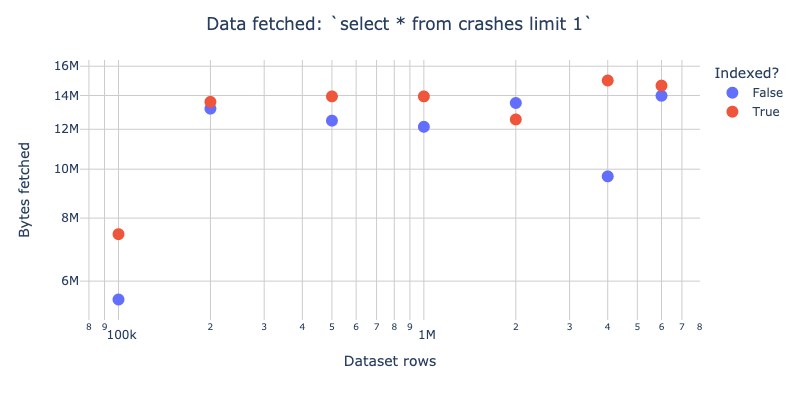

In [25]:
fig = px.scatter(
    stats,
    x='nrows',
    y='fetched',
    log_x=True,
    log_y=True,
    color='indexed',
    labels={
        'fetched': "Bytes fetched",
        'nrows': "Dataset rows",
        'indexed': "Indexed?",
    },
).update_layout(
    title=dict(
        text='Data fetched: `select * from crashes limit 1`',
        x=0.5,
    ),
    plot_bgcolor='white',
).update_xaxes(
    gridcolor='#ccc',
).update_yaxes(
    gridcolor='#ccc',
).update_traces(marker_size=12)
fig.write_image(f'{name}/fetched.png', **dims)
Image(fig.to_image(**dims))